In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# Preprocessing

In [3]:
df.duplicated(subset='user id').sum()

0

In [4]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [5]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [6]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

### Checking categorical variables 

In [7]:
#Check the number of levels for each of the categorical variables
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [38]:
for i in df_cat.columns:
    print(i.upper(), ":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Exploratory Data Analysis

### Univariate Analysis

#### Categorical

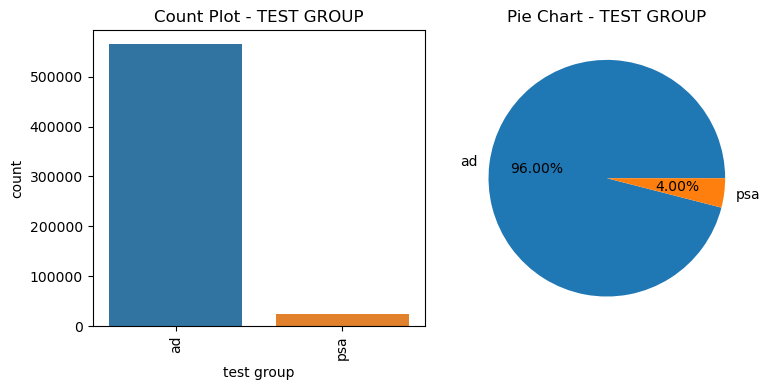

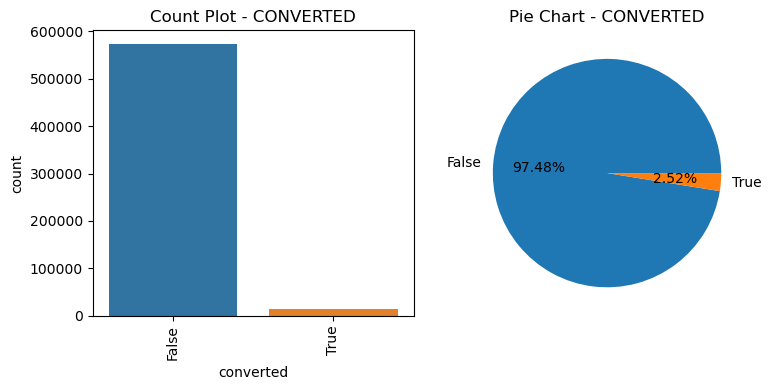

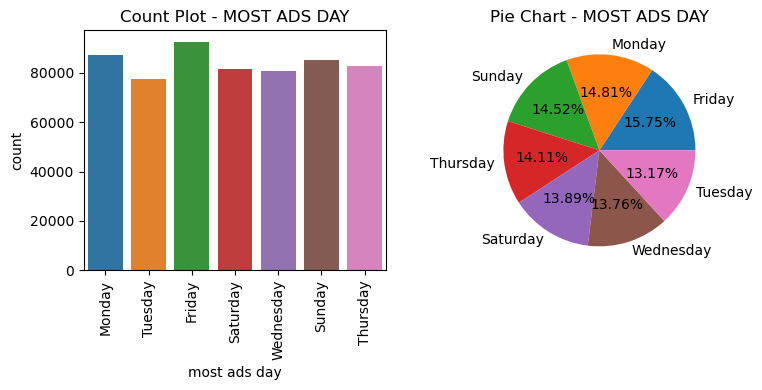

In [39]:
for i in df_cat.columns[:-1]:
    variable = i.upper()

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.countplot(x=i, data=df_cat)
    plt.title(f'Count Plot - {variable}')
    plt.xticks(rotation = 90)

    plt.subplot(1, 2, 2)
    counts = df_cat[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
    plt.title(f'Pie Chart - {variable}')

    plt.tight_layout()
    plt.show()

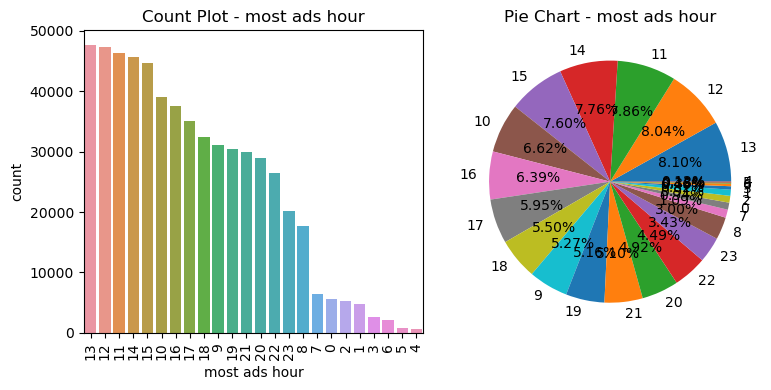

In [43]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()

#### Continuous


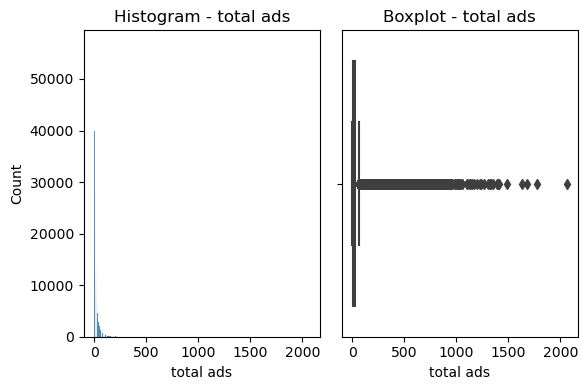

In [46]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

plt.subplot(1, 2, 2)
sns.boxplot(x=variable, data=df)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

In [47]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

Seems like the distribution is extremely skewed. For us to fix this, we can filter the data for a value close to 75th percentile just for a better visualization.

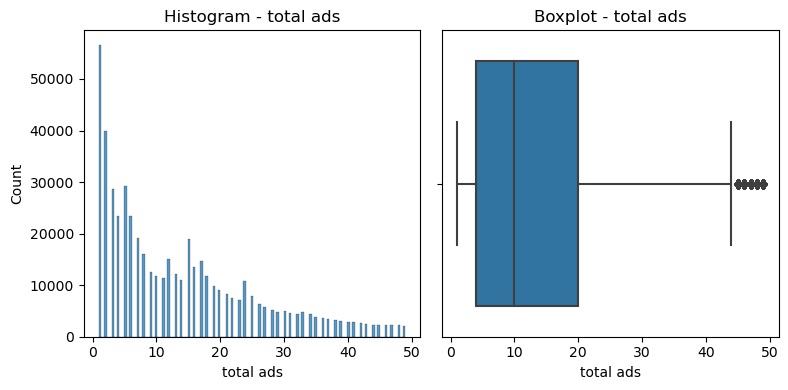

In [49]:
variable = 'total ads'

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads']< 50])
plt.title(f'Histogram - {variable}')

plt.subplot(1, 2, 2)
sns.boxplot(x=variable, data=df[df['total ads']< 50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

## Bivariate analysis

In [51]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [52]:
ct_conversion_test_group = pd.crosstab(df['test group'],df['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


- ~2.5% of viewers purchased the product upon looking at the ad, while ~97.4% didn't
- ~1.8% of viwers purchased upon looking at public service announcement while ~98.2% didn't

<AxesSubplot:xlabel='test group'>

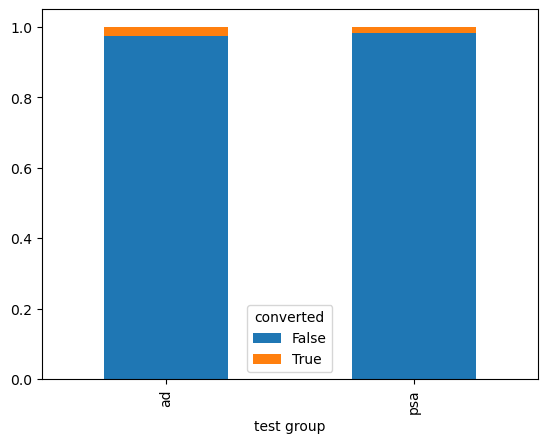

In [53]:
ct_conversion_test_group.plot.bar(stacked=True)

converted        False      True
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<AxesSubplot:xlabel='most ads day'>

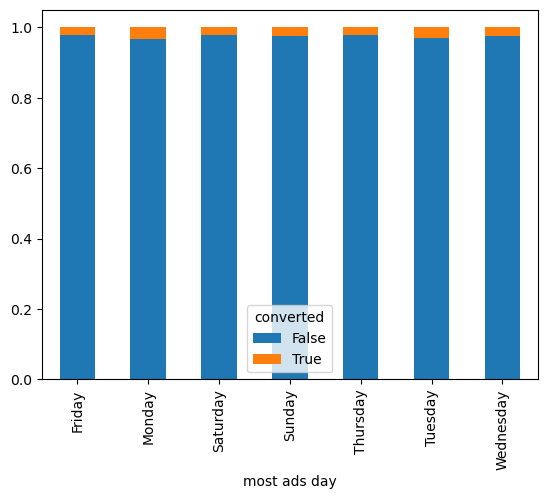

In [55]:
ct_conversion_test_day = pd.crosstab(df['most ads day'],df['converted'],normalize='index')
print(ct_conversion_test_day.sort_values(by=1, ascending=False))
ct_conversion_test_day.plot.bar(stacked=True)

converted         False      True
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<AxesSubplot:xlabel='most ads hour'>

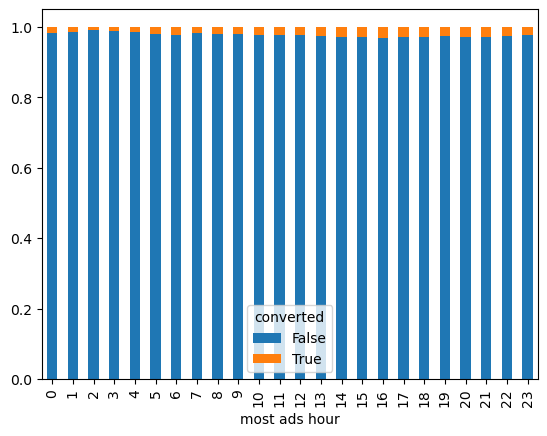

In [56]:
ct_conversion_test_hour = pd.crosstab(df['most ads hour'],df['converted'],normalize='index')
print(ct_conversion_test_hour.sort_values(by=1, ascending=False))
ct_conversion_test_hour.plot.bar(stacked=True)

<AxesSubplot:xlabel='converted', ylabel='total ads'>

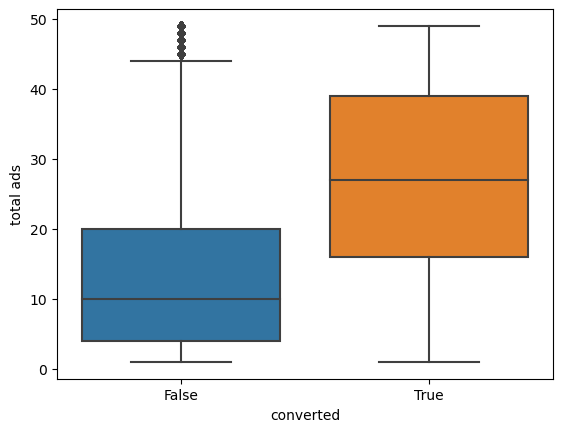

In [59]:
sns.boxplot(x='converted',y='total ads',data=df[df['total ads']<50])

## Statistical Test

In [60]:
df_cat.dtypes

test group       object
converted          bool
most ads day     object
most ads hour     int64
dtype: object

In [62]:
df_cat.head()

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


### Categorical statistical test [Chi-square]

Compares two-categorical variables and test the association on independence between categories.

Let us set our hypotheses:
- H0:  default assumption, no association between variable and converted
- H1: there is an association between the variable and converted

In [73]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        # Create contingency table
        ct = pd.crosstab(df_cat[variable], df['converted'])

        # Perform chi2 test
        chi2, p, _, _ = chi2_contingency(ct)
        print(f"\nChi-squared test for {variable} and converted:")
        print(f"Chi2: {chi2}")
        print(f"P-value: {p}")

        # Calculate Cramér's V
        n = ct.sum().sum()  # Total number of observations
        min_dim = min(ct.shape) - 1  # Minimum dimension minus 1
        cramers_v = np.sqrt(chi2 / (n * min_dim))  # Cramér's V calculation
        print(f"Cramér's V: {cramers_v}")

        # Check if p-value is less than alpha
        if p < alpha:
            print(f"{variable} and converted are dependent (reject H0)")
        else:
            print(f"{variable} and converted are independent (fail to reject H0)")


Chi-squared test for test group and converted:
Chi2: 54.005823883685245
P-value: 1.9989623063390075e-13
Cramér's V: 0.009582842250025765
test group and converted are dependent (reject H0)

Chi-squared test for most ads day and converted:
Chi2: 410.0478857936585
P-value: 1.932184379244731e-85
Cramér's V: 0.02640531359168027
most ads day and converted are dependent (reject H0)

Chi-squared test for most ads hour and converted:
Chi2: 430.76869230822086
P-value: 8.027629823696771e-77
Cramér's V: 0.027064256885019844
most ads hour and converted are dependent (reject H0)


Most ads hour and most ads day plays a significant role on the association with converted. However Cramer's V indicates that the strength of these association might not be that strong.
Some data-driven marketing decision can be implement from here.

### Continuous Statistical Test [Shapiro, t-test]

- Check normality with Shapio-Wilk Test
- Check homogeneity of variances with Levene's Test
- Choose the appropriate test depending on the above result

- Assumption of normality and equal homogeneity of variance: independent t-test
- Assumption of normality and not equal variances: welch's t-test
- When both assumptions fail, Mann-Whitney U Test

In [66]:
from scipy.stats import ttest_ind, shapiro, levene,mannwhitneyu

#Step 1: Check assumptions
#Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted']==1]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted']==0]['total ads'])

print(f"shapiro-wilk test for normality (True group): p-value={shapiro_p_value_true}")
print(f"shapiro-wilk test for normality (False group): p-value={shapiro_p_value_false}")

# Equality of variances
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene test for equality of variances: p-value={levene_p_value}")

shapiro-wilk test for normality (True group): p-value=0.0
shapiro-wilk test for normality (False group): p-value=0.0
Levene test for equality of variances: p-value=0.0


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Above assumptions fails, thus we pick Mann-whitney U test as a non-parametric to compare 2 independent group

In [67]:
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent twp-sample t-test: p-value = {t_p_value}")

else:
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-whitney U test: p-value ={u_p_value}")

Mann-whitney U test: p-value =0.0


In [68]:
# Calculate effect size for Mann-Whitney U test
n1 = len(df[df['converted']]['total ads'])
n2 = len(df[~df['converted']]['total ads'])
u = u_stat
rank_biserial = 1 - (2 * u) / (n1 * n2)
print(f"Rank-biserial correlation (effect size) = {rank_biserial}")

Rank-biserial correlation (effect size) = -0.7085953887113865


There is a highly significant difference between total ads seen and conversion rate. Subsequently, the effect size consideres that there is a strong difference in the number of ads seen and converted. However, the negative sign indicates that the customers who converted tend to have seen fewer ads compared to the group of customers who did not convert.

Thus, we can see all of the variables are statistically significant to conversion rate. However, for the categorical variables, the strength of the association is relatively weak. For the continuous variable, there is a strong negative strength of association.